# Exploratory Data Analysis: Space Exploration

### Import libraries and formatting data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import pyplot
from iso3166 import countries
from datetime import datetime, timedelta
import plotly.express as px
import plotly as py
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from IPython.display import Image

In [2]:
sm = pd.read_csv("Space_Corrected.csv")
sm.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
sm.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### We can see the data contains the following information:
- Name of Company/Organisation launching space missions
- Location of launch
- Date and time of launch
- Launch details (rocket information)
- Status of rocket
- Rocket cost ($) for the mission
- Status of mission (success or failure)

In [3]:
#Retrieve country location for every launch
sm["Country"] = sm["Location"].apply(lambda location: location.split(", ")[-1])

#Dictionary to help with mapping. Following locations fall under the countries listed
countries_list = {"Gran Canaria": "USA", 
                "Barents Sea": "Russian Federation",
                "Russia": "Russian Federation",
                "Pacific Missile Range Facility": "USA", 
                "Shahrud Missile Test Site": "Iran, Islamic Republic of", 
                "Yellow Sea": "China", 
                "New Mexico": "USA",
                "Iran": "Iran, Islamic Republic of",
                "North Korea": "Korea, Democratic People's Republic of",
                "Pacific Ocean": "United States Minor Outlying Islands",
                "South Korea": "Korea, Republic of"}
sm["Country"] = sm["Country"].replace(countries_list)

In [4]:
#Format dates to create desired columns respectively
sm["Datum"] = pd.to_datetime(sm["Datum"])
sm["Year"] = sm["Datum"].apply(lambda datetime: datetime.year)

In [5]:
#Retrieve rocket names from "Detail" 
sm["Rocket Name"] = sm["Detail"].apply(lambda rocket: rocket.split("|")[0])

In [6]:
sm.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Year,Rocket Name
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,Falcon 9 Block 5
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,Long March 2D
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,Starship Prototype
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,Proton-M/Briz-M
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,Atlas V 541


# Exploring Our Data

## Simple Analysis

To start off simply, we can count the number of launches carried out by each organisation. 

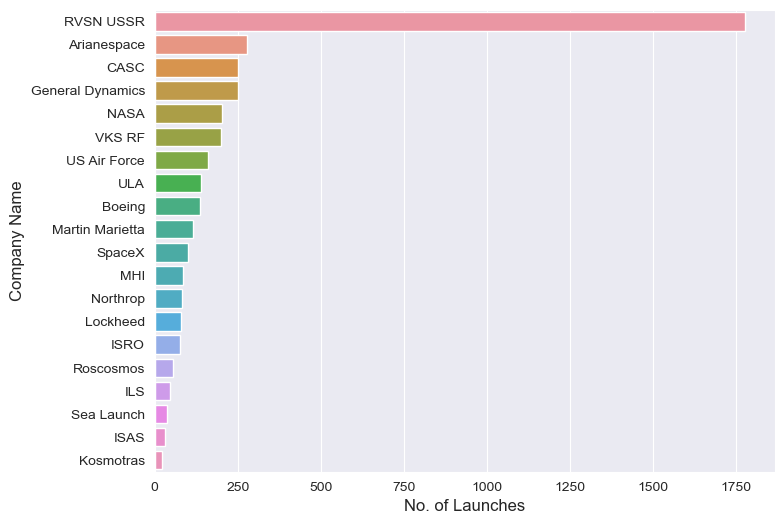

In [7]:
plt.figure(figsize=(8,6))
company = sm["Company Name"].value_counts().head(20).index
sns.countplot(y="Company Name", data=sm, order=company)
plt.xlabel("No. of Launches", fontsize=12)
plt.ylabel("Company Name", fontsize=12)
plt.show()

We can see that RVSN USSR of Russia has launched the most number of rockets by far in comparison to other companies. 

However, if we take a look at launches by country, this tells a different story. 

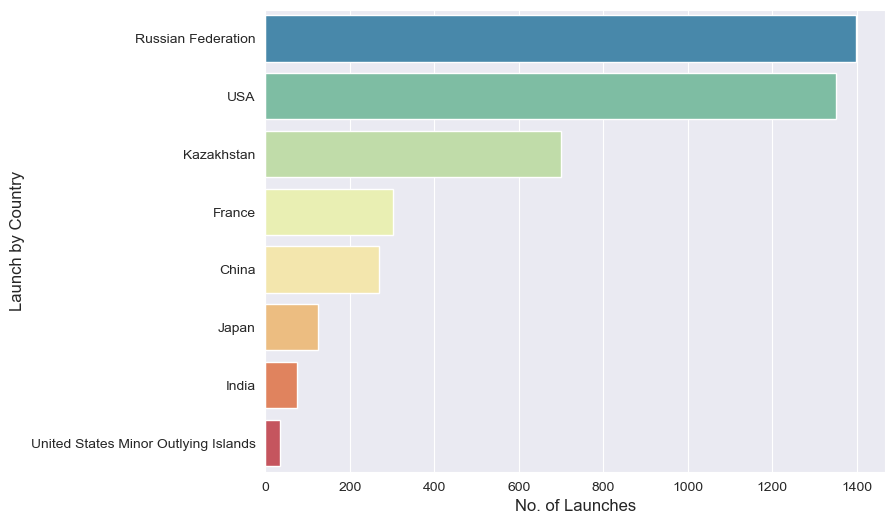

In [8]:
#Plotting a bar chart to show launches by country
plt.figure(figsize=(8,6))
sns.color_palette("rocket_r", as_cmap=True)
company = sm["Country"].value_counts().head(8).index
sns.countplot(y="Country", data=sm, order=company, palette=("Spectral_r"))
plt.xlabel("No. of Launches", fontsize=12)
plt.ylabel("Launch by Country", fontsize=12)
plt.show()

Here we can see the USA trailing behind very closely in relation to the number of launches made by the Russian Federation, with launches in Kazakhstan also conducted by RSVN USSR. 

To get a stronger visual understanding, we can do the following.

In [9]:
#First to retrieve country codes
def iso(country):
    return countries.get(country).alpha3
sm["ISO3"] = sm["Country"].apply(lambda country: iso(country))

#Now to count up the countries
iso3 = sm["ISO3"].value_counts()

In [10]:
#Use a choropleth diagram to visualise density of number of launches on a map
fig = px.choropleth(sm, 
                    locations=iso3.index, 
                    color=iso3.values, 
                    hover_name=iso3.index, 
                    projection="natural earth", 
                    color_continuous_scale="Sunset_r",
                    labels={"color":"Launches"})
fig.update_layout(margin=dict(l=80, r=80, t=30, b=5),
                 title={ "text" : "<b>Number of launches by each country</b>", "x" : 0.5}
                 )
fig.show()

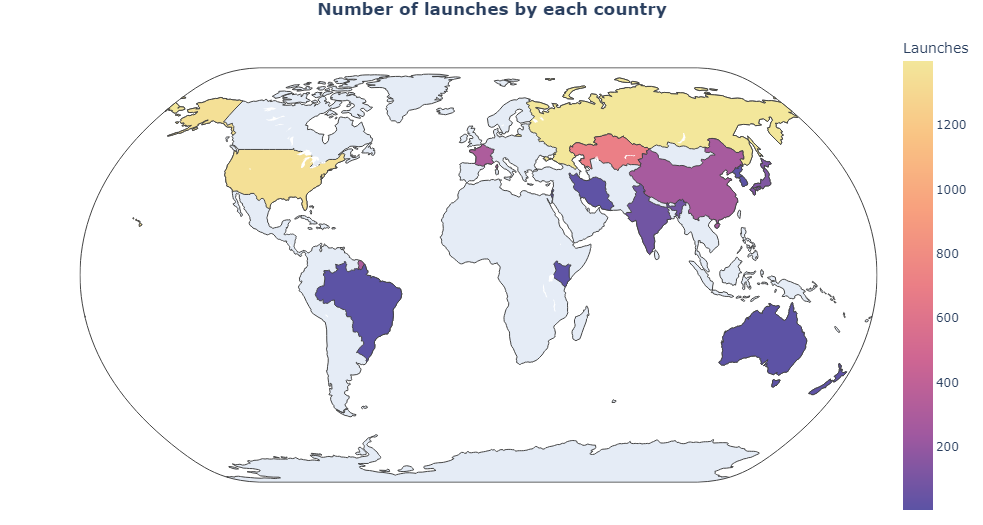

In [23]:
Image("Number of launches by each coutnry.png")

As per the spectrum on the right, coutries in yellow represent a higher launch count where as conutries in blue represent a lower launch count. 
And we can do a similar search for the number of launches per launch site to strengthen our findings.

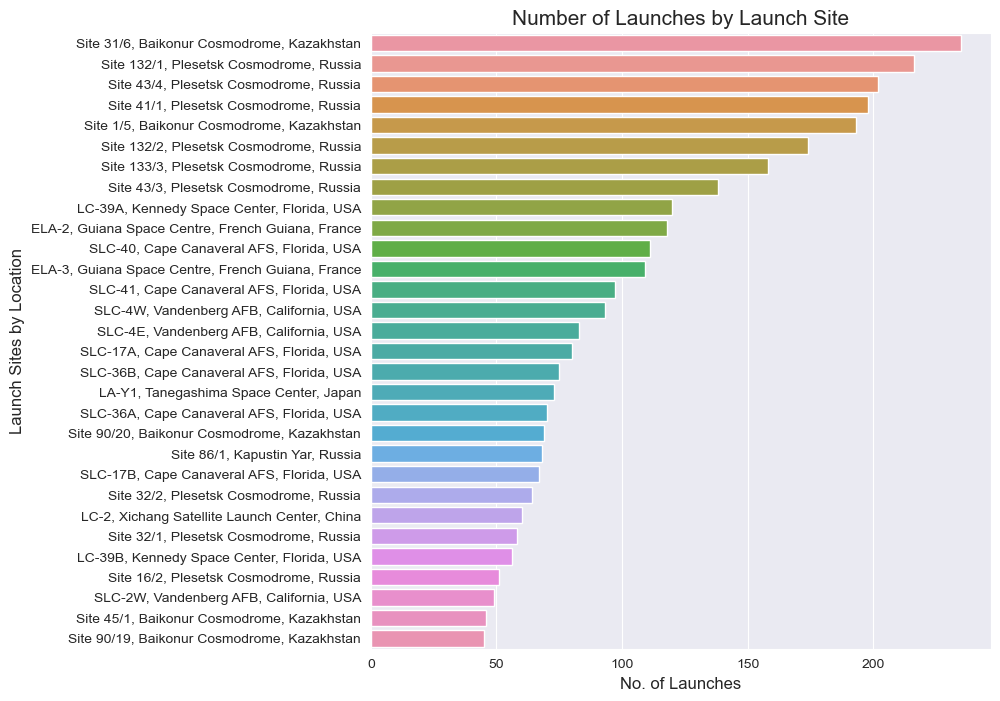

In [11]:
#Plotting a bar chart of the top 30 launch sites with the most launches carried out
plt.figure(figsize=(8,8))
location_count= sm["Location"].value_counts().head(30).index
sns.countplot(y="Location", data=sm, order=location_count)
plt.title("Number of Launches by Launch Site", fontsize=15)
plt.xlabel("No. of Launches", fontsize=12)
plt.ylabel("Launch Sites by Location", fontsize=12)
plt.show()

The locations of launch sites across the years have taken place mostly from the Russian Federation(USSR) and USA. From the data we have looked at thus far, we can deduce that space exploration has predominanlty been dominated by these two countries.

Taking a look through history, our biggest activity in space exploration came not long after we discovered the technology to send machine and man beyond Earth's atmospehere. 

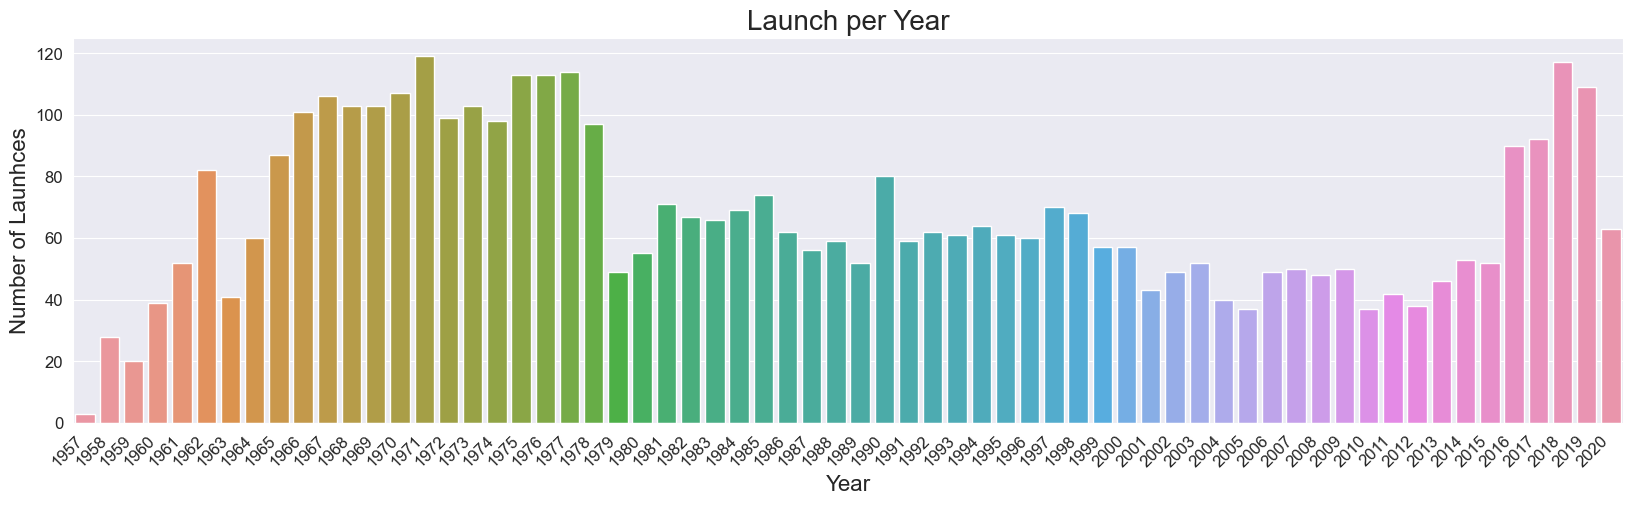

In [12]:
plt.figure(figsize=(20,5))

g = sns.countplot(x=sm["Year"])
g.set_title("Launch per Year", fontsize=20)

g.set_xlabel("Year", fontsize=16)
plt.xticks(rotation=45, ha="right")

g.set_ylabel("Number of Launhces", fontsize=16)
g.tick_params(labelsize=12)

plt.show()

The 1960's and 1970's sees the highest number of launches in history which is when the space race took place during the Cold War. As the space race came to an end, space exploration slowed down. But as of recent, other national/international space agencies and organisations have had large success of their own. 

## A Team Effort

As we saw previously, RSVN USSR made up a large portion of the number of rockets launched. However categorising them by launches per country, USA tallied a similar number of launches to the Russian Federation. We can use a sunburst diagram to illustrate the organisations within their countries and the success they've had. 

In [13]:
fig = px.sunburst(sm, path = ["Country", "Company Name", "Status Mission"])
fig.update_layout(margin=dict(l=80, r=80, t=25, b=10),
                 title={ "text" : "<b>Country Succes Rate</b>", "x" : 0.5}
                 )
fig.show()

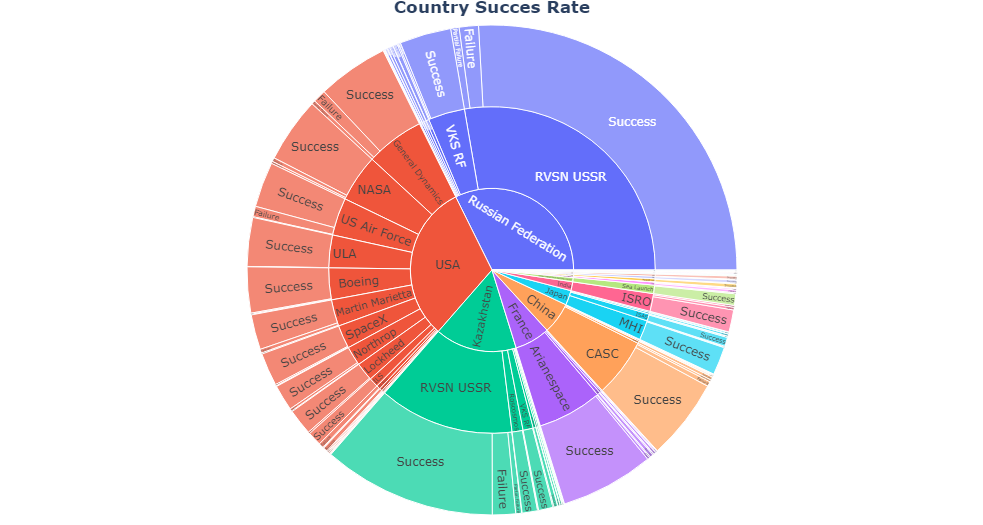

In [24]:
Image("Country Success Rate.png")

From this diagram we can see missions by France, China, Japan and India have also had large success with notable organisations including RSVN USSR, NASA, Ariancespace, CASC, MHI and ISRO. 

Let's take a look at what portion each organisation contributed to in respective to the number of missions launched for the following countries; Russian Federation, USA, France, China and Japan. 

In [14]:
#Focusing on data of the above mentioned countries
sm_select_five = sm[(sm["Country"] == "Russian Federation") | (sm["Country"] == "USA") | (sm["Country"] == "France") | (sm["Country"] == "China") | (sm["Country"] == "Japan")]

#Group the data by Country and Organisation, and count the number of missions
missions = pd.DataFrame(sm_select_five.groupby(["Country", "Company Name"])["Location"].count())
missions.rename({"Location":"No. of Missions"}, axis=1, inplace=True)


In [15]:
#Plotting the number of launches by companies ot tally the total launch for their respective countries
chart = px.bar(missions.reset_index(),
               y="Country",
               x="No. of Missions",
              color="Company Name",
              text="Company Name")
chart.update_layout(title="Number of Missions by Country and Company")
chart.show()

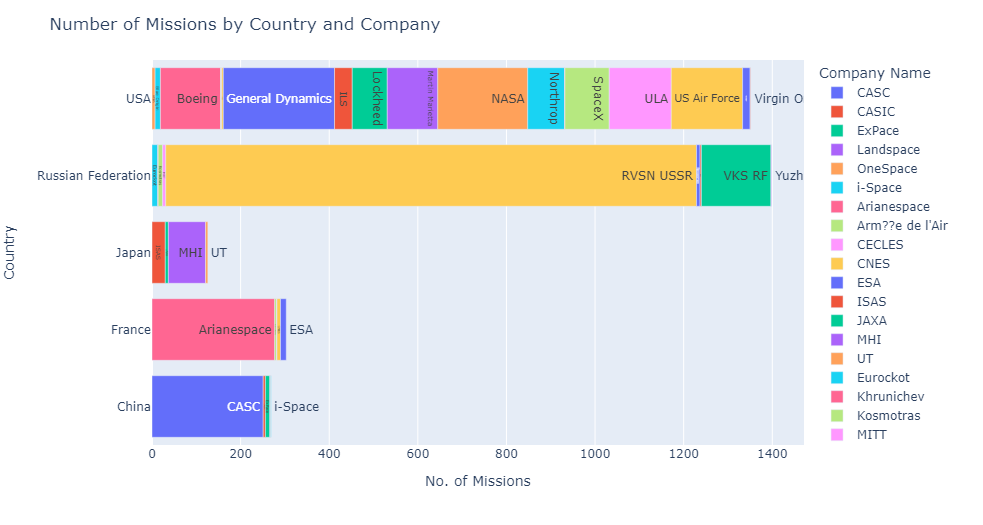

In [25]:
Image("Number of Missions by Country and Company.png")

Despite a large list of organisations shown within this visualisation, the number of missions in USA is more or less evenly distrubuted amongst its independent organisation. This explains how USA as a conutry had similar launch volumes to the Russian Federation.  

Now lets take a look at the number of launches from each of the countries per year.  

In [16]:
#Group the data by Country and Year, and count the number of missions
missions_2 = pd.DataFrame(sm_select_five.groupby(["Country", "Year"])["Location"].count())

In [17]:
#Plotting the number of launches by country that took place over the years
chart_2 = px.bar(missions_2.reset_index(level=[0,1]), 
                 y="Location", 
                 x="Year", 
                 color="Country")
chart_2.update_layout(title="Number of Missions by Countries across the years",
                      yaxis_title="Number of Launches")
chart_2.show()

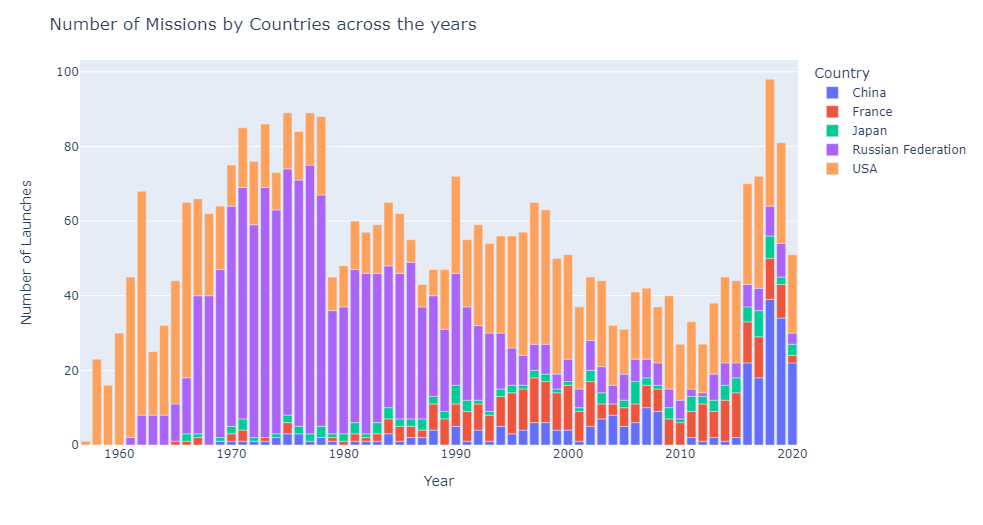

In [26]:
Image("Number of Missions by Coutnries across the years.png")

This breakdown allows us to visibly understand what countries contributed to the number of launches throughout the years. USA(orange) remains largely active but the contribution by the Russian Federation(purple) diminishes past the 1990's. Something worthy to note is the recent increase in launch activity by other countries, most notably France and China. 

By analysing at this trend, the number of missions is looking to increase as we see a rise in announcements for space exploration with hopes of sending humans beyond our Earth's orbit once more. 

## Mission Cost

A question worth asking is just how expensive is it to send rockets into space. And is there a correlation between cost and recent sruge in rocket launches by private organisations.  

In [18]:
#Cleaning the data for rocket cost from object to float
sm.rename({" Rocket":"Rocket Cost"},axis=1, inplace=True)
sm["Rocket Cost"] = sm["Rocket Cost"].apply(lambda x: str(x).replace(",",""))
sm["Rocket Cost"] = sm["Rocket Cost"].astype("float64")
sm["Rocket Cost"] = sm["Rocket Cost"].fillna(0)

In [19]:
(sm["Rocket Cost"] == 0).value_counts()

True     3360
False     964
Name: Rocket Cost, dtype: int64

Unfortunately there is a large portion of missing data for rocket cost. However we can analyse what we have and visualise this using a scatter plot. 

In [20]:
#Use a scattter plot to show the relationship between cost per country over the years
fig = px.scatter(sm[sm["Rocket Cost"].between(1,4999)], 
                x="Year", 
                y="Country", 
                color="Status Mission",
                color_discrete_map={
                    "Success":"RebeccaPurple",
                    "Failure":"Crimson",
                    "Partial Failure":"Gold",
                    "Prelaunch Failure":"AquaMarine"},
                size="Rocket Cost", 
                size_max=35)
fig.update_layout(margin = dict(l=80, r=80, t=50, b=10), template = "simple_white", 
                  title = { "text" : "<b>Total Mission Cost (millions) by Country</b>", "x" : 0.5})
fig.show()

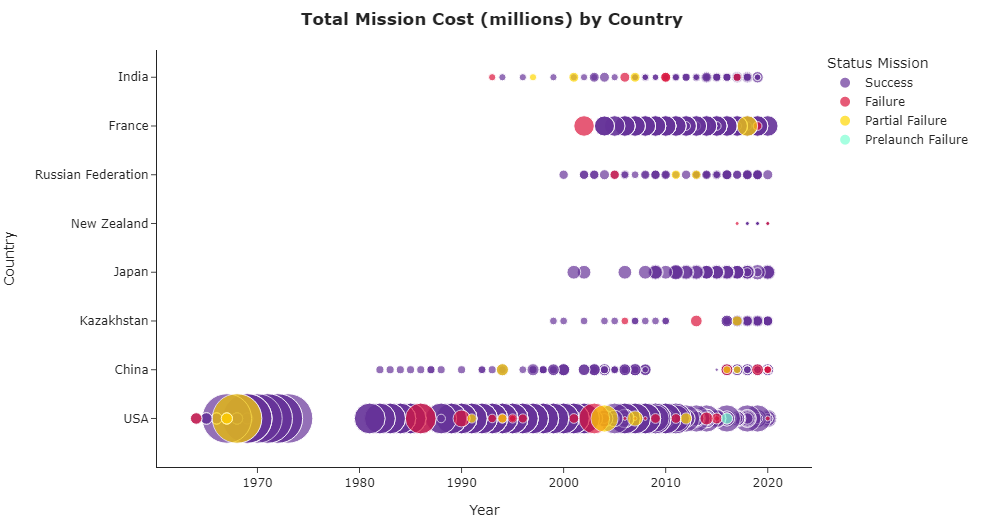

In [27]:
Image("Total Mission Cost by Coutnry.png")

As we can tell, the cost for rockets in the early years were significantly higher than now. Recently, rockets have become more efficient and reliable with advances in technology. As a result we have been able to reduce costs and make it easier for organisations to launch rockets with higher frequencies., allowing room for trial and error.  

In [21]:
#New scattter plot to show the relationship between cost per organisation over the years
fig = px.scatter(sm[sm["Rocket Cost"].between(1,4999)], 
                x="Year", 
                y="Company Name", 
                color="Status Mission", 
                color_discrete_map={
                    "Success":"RebeccaPurple",
                    "Failure":"Crimson",
                    "Partial Failure":"Gold",
                    "Prelaunch Failure":"AquaMarine"},
                size="Rocket Cost", 
                size_max=27)
fig.update_layout(margin = dict(l=80, r=80, t=50, b=10), template = "simple_white", 
                  title = { "text" : "<b>Total Mission Cost (millions) by Organisation</b>", "x" : 0.5})
fig.show()

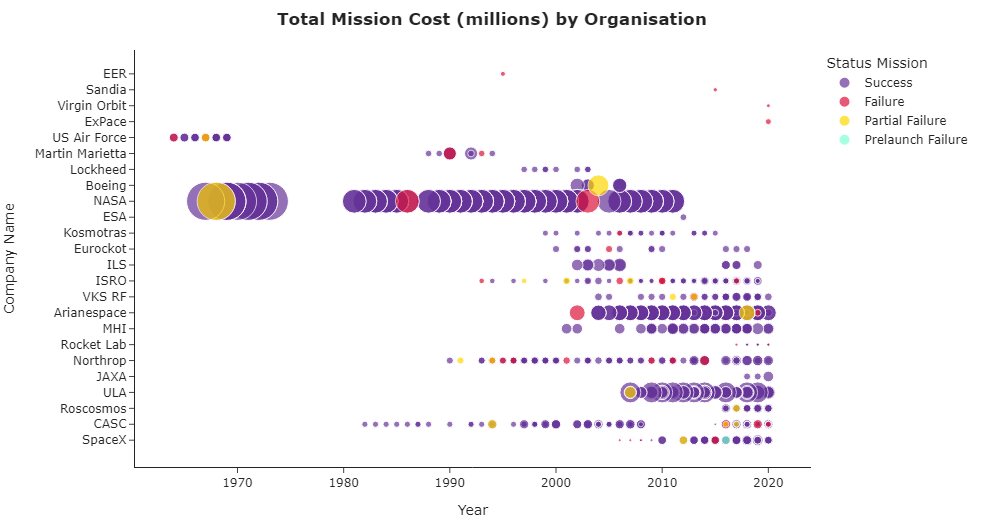

In [28]:
Image("Total Mission Cost by Organisation.png")

To strenghten our previous point, launches made by organisations past the year 2000 have been able to carry out more launches despite any sort of failures. Using SpaceX (a private space organisation) as an example, between 2006-2008, all 3 launches ended in failure. However the cost were very low for a rocket launch and they have been able to invest in more launches with higher success towards 2020. 

More and more organisations are taking to the skies once more and continuous avdances in technology and resources have made future missions very promising and exciting.  